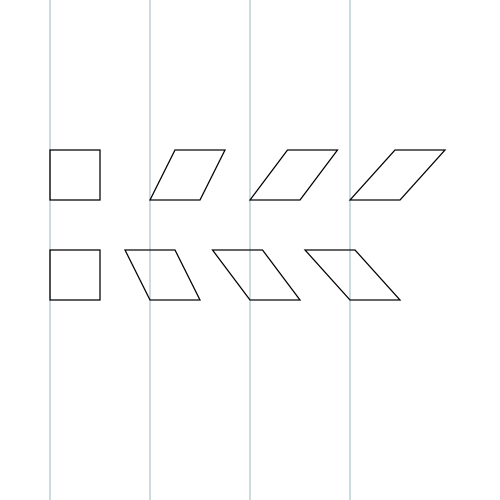

In [88]:
"""
Mathematical Illustrations In PostScript
A Manual of Geometry and PostScript
by Bill Casselman
http://www.math.ubc.ca/~cass/graphics/manual/

Chapter 2
"""

import math
from collections import namedtuple

from IPython.display import SVG
from lxml import etree


##### Code I'm reusing from chapter one #####
def get_svg_element(canvas_height, canvas_width, height, width, x_translate=0, y_translate=0):
    svg = etree.Element(
        "svg",
        version="1.1",
        height=str(canvas_height),
        width=str(canvas_width),
        baseProfile="full",
        viewBox=f"{x_translate} {y_translate} {width} {height}",
        lxmns="http://www.w3.org/2000/svg",
    )
    return svg

class SVGShape:
    def __init__(self, points, stroke_width=0.025, stroke_color="black", fill="none"):
        self.points = points
        self.stroke_width = stroke_width
        self.stroke_color = stroke_color
        self.fill = fill

        
class Line(SVGShape):
    def element(self):
        self.points = [Point(str(p.x), str(p.y)) for p in self.points]
        this_element = etree.Element(
            "line",
            x1=self.points[0].x,
            y1=self.points[0].y,
            x2=self.points[1].x,
            y2=self.points[1].y,
            stroke=self.stroke_color
        )
        this_element.set("stroke-width", str(self.stroke_width))
        return this_element

    
class Polygon(SVGShape):
    def element(self):
        points_list = " ".join([f"{p.x},{p.y}" for p in self.points])
        this_element = etree.Element(
            "polygon", 
            points=points_list, 
            stroke=self.stroke_color, 
            fill=self.fill
        )
        this_element.set("stroke-width", str(self.stroke_width))
        return this_element


def render_elements(elements, height=10, width=10):
    translate = -(height/2)
    svg = get_svg_element(500, 500, height, width, translate, translate)
    plane = etree.Element("g", transform="scale(1,-1)")
    svg.append(plane)
    
    for element in elements:
        plane.append(element.element())
        
    return etree.tostring(svg)

# Exercise 2.1. Define the skew of a parallelogram to be the length of the 
# perpendicular projection of its upper left corner onto its base line, divided 
# by the length of the base. Count negatively to the left. A parallelogram is a 
# rectangle if and only if its skew is 0. The argument above shows that if the 
# skew s satisfies 0 < s ≤ 1, then the simple decomposition will prove the 
# claim. Explain by a picture what happens if −1 ≤ s < 0.

Point = namedtuple('Point', 'x y')

class Parallelogram:
    def __init__(self, base, height, skew, origin=Point(0,0)):
        self.base = base
        self.height = height
        self.skew = skew
        self.origin = origin
        self.points = []
        self.get_points()
        
    def get_points(self):
        """Lower left vertex A, upper left B, upper right C and lower right D"""
        a = self.origin
        b = Point(a.x + self.skew, a.y + self.height)
        c = Point(b.x + self.base, b.y)
        d = Point(a.x + self.base, a.y)
        self.points = [a, b, c, d]
    
left_x_skew = [(-4, 0), (-2, .5), (0, .75), (2, .9)]

lines = [Line([Point(x[0], 5), Point(x[0], -5)], stroke_color="#adc6ce") for x in left_x_skew]

positive_skews = [Polygon(Parallelogram(1, 1, x[1], Point(x[0], 1)).points) for x in left_x_skew]
negative_skews = [Polygon(Parallelogram(1, 1, -x[1], Point(x[0], -1)).points) for x in left_x_skew]

data = render_elements(lines + positive_skews + negative_skews)
SVG(data=data)

    

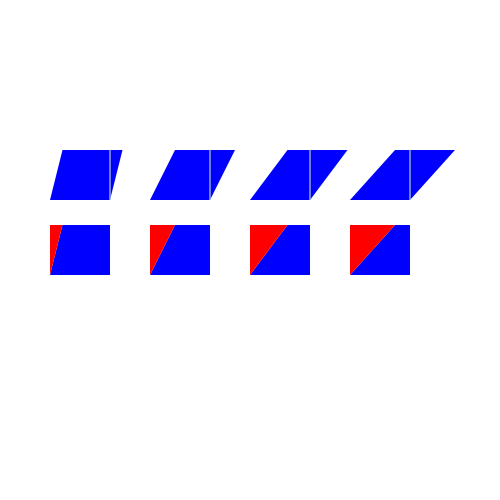

In [92]:
# Exercise 2.2. Explain the argument in the previous exercise by producing figures in PostScript.
#
# I'm not exactly sure what this is asking for, but I already showed that a parallelogram
# is a rectangle if the skew is 0, so now I'm going to try to illustrate the decomposition
# of the paralellogram into a rectangle

def get_cut_point(self):
    """Use the X coordinate from the lower-right vertex and 
       the Y coordinate from the upper-left vertex"""
    return Point(self.points[3].x, self.points[1].y)

def cut_line(self):
    return [self.points[3], self.get_cut_point()]

def remaining_section(self):
    return [self.points[0], self.points[1], self.get_cut_point(), self.points[3]]

def cut_section(self):
    return [Point(p.x - self.base, p.y) for p in [self.get_cut_point(), self.points[2], self.points[3]]]

Parallelogram.get_cut_point = get_cut_point
Parallelogram.cut_line = cut_line
Parallelogram.remaining_section = remaining_section
Parallelogram.cut_section = cut_section

# paralellograms
pgram_arguments = [(-4, .25), (-2, .5), (0, .75), (2, .9)]
pgrams = [Parallelogram(1.2, 1, arg[1], Point(arg[0], 1)) for arg in pgram_arguments]
pgram_elements = [Polygon(p.points, stroke_width=0, fill="blue") for p in pgrams]
lines = [Line(p.cut_line(), stroke_color="#adc6ce") for p in pgrams]

rectangle_pgrams = [Parallelogram(1.2, 1, arg[1], Point(arg[0], -.5)) for arg in pgram_arguments]
remaining_sections = [Polygon(p.remaining_section(), stroke_width=0, fill="blue") for p in rectangle_pgrams]
cut_sections = [Polygon(p.cut_section(), stroke_width=0, fill="red") for p in rectangle_pgrams]

data = render_elements(pgram_elements + lines + remaining_sections + cut_sections)
SVG(data=data)


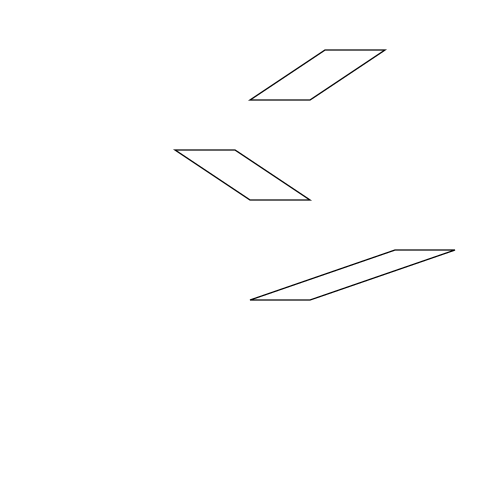

In [121]:
# Exercise 2.3. The second group of pictures shows what happens if 1 < s ≤ 2. 
# What about −2 ≤ s < −1? 2 < s ≤ 3?

pgram_arguments = [(3, 1.5), (1, -1.5), (-1, 2.9)]
pgrams = [Parallelogram(1.2, 1, arg[1], Point(0, arg[0])) for arg in pgram_arguments]
pgram_elements = [Polygon(p.points) for p in pgrams]

data = render_elements(pgram_elements)
SVG(data=data)

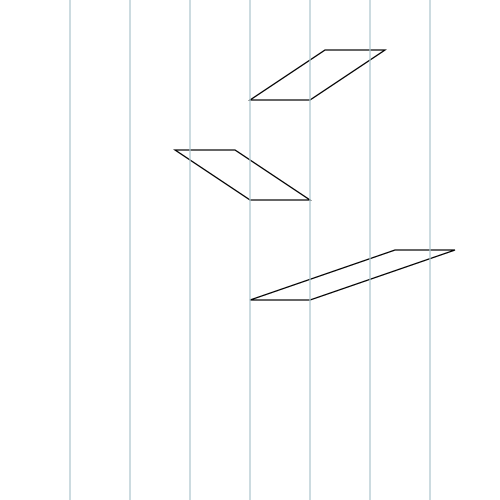

In [122]:
# Exercise 2.4. If the skew s satisfies n < s ≤ n + 1 (n positive), what is the 
# least number of pieces in the decomposition of the parallelogram and 
# rectangle into congruent pieces suggested by the above reasoning?

# skew 0 => 0 cuts (1 piece)
# skew 0..1 => 1 cut (2 pieces)
# skew 1..2 => 2 cuts (3 pieces, the original + 2 cuts)
# skew -1..-2 => 2 cuts (3 pieces)
# skew 2..3 => 3 cuts (4 pieces)

# The pattern suggests a least number of n+1 pieces if n is positive

def base_length_gen(base, start_x):
    yield start_x
    x = start_x + base
    while x < 4:
        yield -x
        yield x
        x = x + base
    
base = 1.2
start_x = 0
lines = [Line([Point(x, 5), Point(x, -5)], stroke_color="#adc6ce") for x in base_length_gen(base, start_x)]

data = render_elements(pgram_elements + lines)
SVG(data=data)

In [ ]:
# Exercise 2.5. The reasoning above has just shown how the decomposition of 
# rectangle and parallelogram works in a few cases, and the exercises above 
# have shown how to include a few more cases. Write out in detail a recipe for 
# making congruent decompositions of rectangle and parallelogram that will 
# prove the claim when the skew s satisfies 0 < n < s ≤ n + 1.

# Given n, create "cut points" every base * n and use these points to 
# decompose the parallelgram. This should work for both positive and
# negative values of n. 

def decompose(self):
    """Use self.skew and self.base to populate a list of Point[] self.pieces
    I also want something like self.pieces_as_rectangle, I don't know if it'd be 
    better to create another list of points as I create self.pieces, or it's better
    to create a method that modifies self.pieces and returns a list of points.
    I'm going to try first using a seperate method because it keeps this decompose 
    method simpler.
    """   
    """
    eh... find the vertical lines and use the equation of the parallelogram lines
    to find the intersections, then take the original 4 points, plus all of the 
    intersection points, all of the points up to one intersecting line become a shape,
    and then from that intersection to the next become a shape, an so on.
    """
    """
    eh... or more like a combination of these two approaches, still iterate down the 
    parallelogram by length of base, but use equation of the line to find the endpoints
    for each section, and make sure to include any other points in the parallelogram that
    fall within that section, i.e. some shapes have 5 points, don't lose the 5th point.
    """
    """
    need to get the equation of the line for the sides, and this is assuming my parallelograms 
    have a base and top with a slope = 0. So to do the operation on other parallelograms, I'd need
    to transform them first and then I could undo the transformation at the end.
    """
    
    self.pieces = []
    pieces_to_cut = int(self.skew) + 1
    
    # if skew is positive I want to work towards the right and
    # if skew is negative I want to work towards the left...
    
    if self.skew > 0:
        base = self.base
    else:
        base = -self.base
    
    start_bottom = self.points[0]
    start_top = self.points[1]
    
    while pieces_to_cut: 
        end_bottom = start_bottom * base
        end_top = 
    
    
    
    

In [124]:
int(5.9)

5